---
# **Introduction To Machine Learning**
## **Supervised Learning (= classification):**

*   **k-Nearest Neighbor (kNN)**
*   naive Bayesian (NB)
*   Decision Tree (DT): C4.5, CART, etc.
*   AdaBoost
*   Support Vector Machine (SVM)
---

kNN is a simple algorithm that stores all available cases and classifies new cases based on a distance metric (e.g., Euclidean distance metric).
![Distance Formula](https://miro.medium.com/max/626/1*whWqafWqGnpM-_3SDEypPA.png)


## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>The Banknote Authentication Dataset:</b> There are 1372 items (images of banknotes — think Euro or dollar bill). There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery). 

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<b> ASSIGNMENT: </b> Use Iris data, which is a small, widely-used, easy classic dataset from Fisher, 1936. 

https://archive.ics.uci.edu/dataset/53/iris

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [2]:
col_names = ['Variance of Image', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_table('data_banknote_authentication.txt', sep = ',', header = None, names = col_names)
df.tail(3)

,Variance of Image,Skewness,Kurtosis,Entropy,Class
1369,-3.7503,-13.45860,17.5932,-2.7771,1
1370,-3.5637,-8.38270,12.3930,-1.2823,1
1371,-2.5419,-0.65804,2.6842,1.1952,1


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variance of Image  1369 non-null   float64
 1   Skewness           1371 non-null   float64
 2   Kurtosis           1370 non-null   float64
 3   Entropy            1372 non-null   float64
 4   Class              1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### <font color = blue> Visualize the whole dataset

/Users/Cho/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


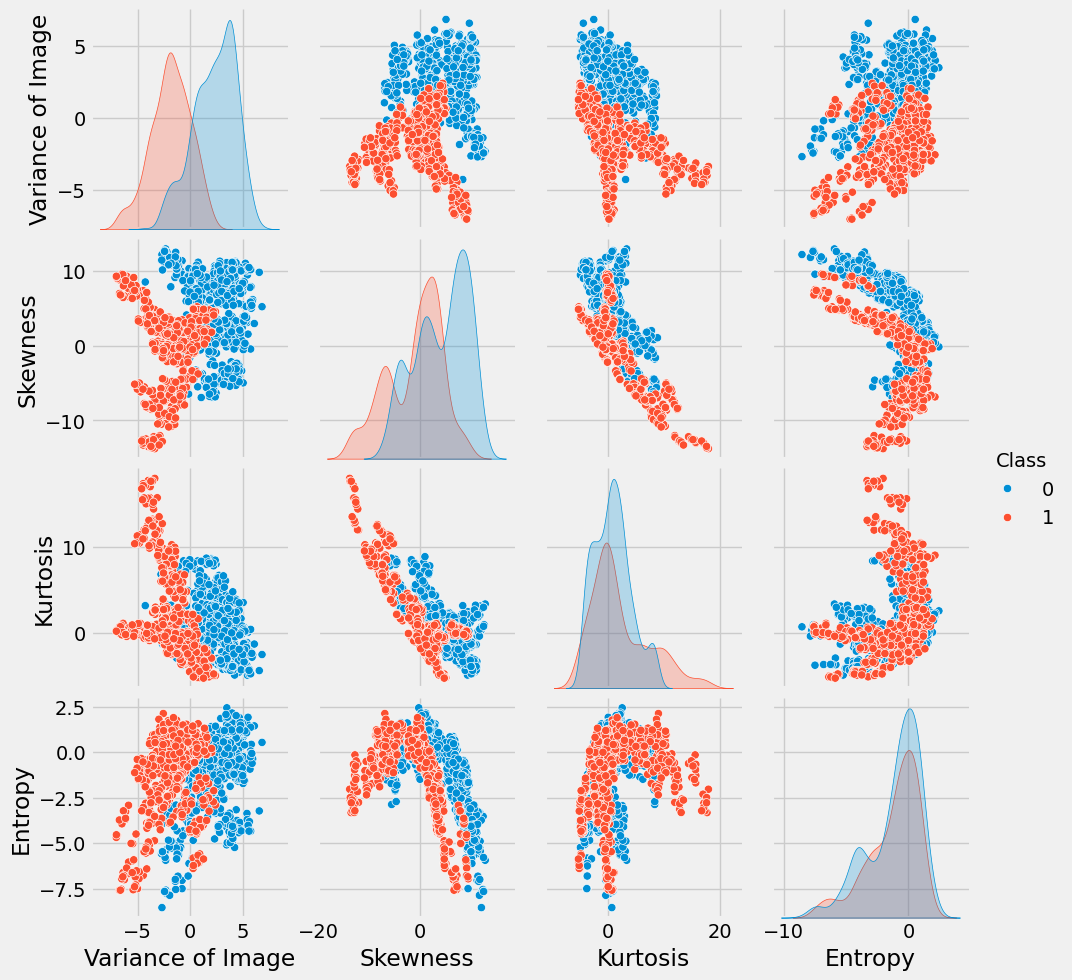

In [4]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Class')

#### <font color = blue> Visualize the Label Class

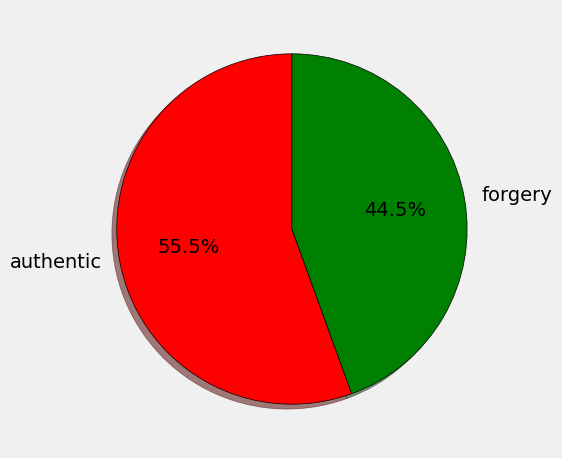

In [5]:
authentic = df[df['Class'] == 0].shape[0]
forgery = df[df['Class'] == 1].shape[0]

label = [authentic, forgery]
plt.pie(label, labels = ['authentic', 'forgery'], shadow = True, wedgeprops = {'edgecolor': 'black'},
       autopct = '%1.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we define our predictor and target attribute. Then we oversee missing values because we found some missing values in the first three columns. To deal with the missing value we use Simple Imputer from sklearn and apply the mean strategy to our predictor data. After that, we apply Feature Scaling on our data as we know Feature Scaling is the most important part of data preprocessing. If we see our dataset, then some attribute has information in Numeric value some value is extremely high, and some are exceptionally low if we see the Variance of Image and Entropy. This will cause some issues in our machinery model to solve that problem we set all values on the same scale there are two methods to solve that problem and we use Standard Scaler. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2, respectively.
> Define Predictor and target <br> Attribute Dealing with Missing Value <br> Feature Scaling <br> Split the Data into Train and Test

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [6]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
print('predictor attribute', X)
print('target attribute', Y)

predictor attribute [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
target attribute [0 0 0 ... 1 1 1]


### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [7]:
df.isnull().sum()          

Variance of Image    3
Skewness             1
Kurtosis             2
Entropy              0
Class                0
dtype: int64

#### <font color = blue> Apply Mean Strategy to Handle Missing Value

In [8]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')       
imputer  = imputer.fit(X)
X = imputer.transform(X)
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

In [9]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.12443818,  1.14917295, -0.97587762,  0.35456135],
       [ 1.4499974 ,  1.06412906, -0.89492756, -0.12876744],
       [ 1.21052135, -0.7785795 ,  0.12253144,  0.61807317],
       ...,
       [-1.47211061, -2.62377781,  3.76006109, -0.75488418],
       [-1.4063859 , -1.7581787 ,  2.55284418, -0.04315848],
       [-1.04648498, -0.44088347,  0.29896404,  1.1364645 ]])

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [11]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (1097, 4)
Y_train (1097,)


#### <font color = blue> Testing Data

In [12]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (275, 4)
X_test (275,)


## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build k-Nearest Neighbors </font>
In this part, we build k-Nearest Neighbors from scratch and with sklearn as well.

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation from Scratch </font>

#### <font color = blue> Build Model </font>

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

#### <font color = blue> Inititialize Model </font>

In [14]:
knn_scratch = KNN( k = 5)

#### <font color = blue> Fit the Training Data into Model</font>

In [15]:
knn_scratch.fit(X_train, y_train)

#### <font color = blue> Predict the Test Data</font>

In [16]:
Y_predict_scratch = knn_scratch.predict(X_test)
Y_predict_scratch

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

#### <font color = blue> Accuracy Score</font>

In [17]:
Accuracy_Scratch = accuracy_score(Y_predict_scratch, y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 1.0


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model from Scikit-learn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

#### <font color = blue> Initialize the Model

In [19]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)

#### <font color = blue> Fit the Training Data into Model

In [20]:
knn_Sklearn.fit(X_train, y_train)

KNeighborsClassifier()

#### <font color = blue> Predict the Test Data</font>

In [21]:
Y_predict_Sklearn = knn_Sklearn.predict(X_test)
Y_predict_Sklearn

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

#### <font color = blue> Accuracy Score</font>

In [22]:
Accuracy_Sklearn = accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 1.0


### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Comparison (Scratch vs. Scikit-Learn) </font>

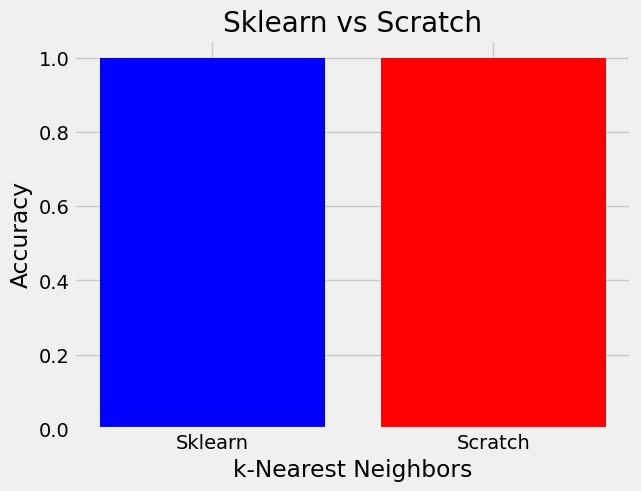

In [23]:
accuracy = [Accuracy_Sklearn, Accuracy_Scratch]
label = ["Sklearn", "Scratch"]
plt.bar(label, accuracy, color = ['blue', 'red'])
plt.title("Sklearn vs Scratch")
plt.xlabel("k-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

> As we can see 100% accuracy from both implementation

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the k-Nearest Neighbors Scratch model (it's doesn't matter because 100% result from both implementation). first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<Axes: >

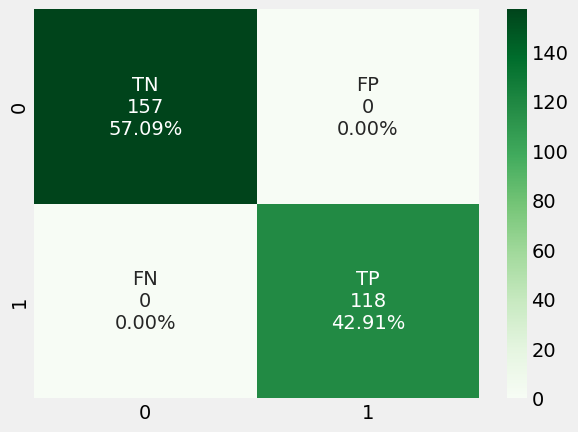

In [24]:
confusion_matrix_Scratch = confusion_matrix(Y_predict_scratch, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [25]:
# Accuracy Score
Accuracy = accuracy_score(Y_predict_scratch, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(Y_predict_scratch, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(Y_predict_scratch, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(Y_predict_scratch, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(Y_predict_scratch, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(Y_predict_scratch, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
False positive Rate 0.0
F1 Score: 1.0
Specificity: 1.0
Mean Absolute Error: 0.0
ROC Area: 1.0


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 8 artists>

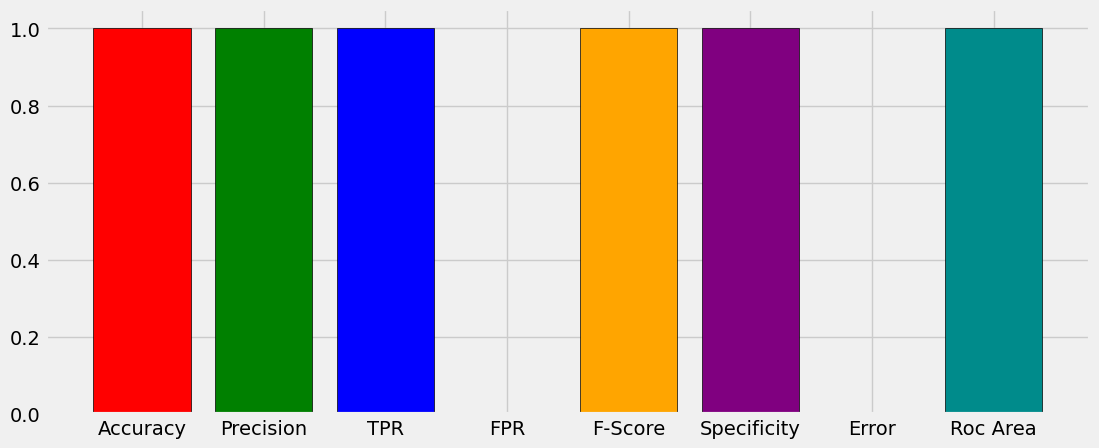

In [26]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

In [27]:
col = ['Variance of Image', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
pd.DataFrame([[3.1111, 8.8282, 4.111, -2.34422, '?']], columns =col)

,Variance of Image,Skewness,Kurtosis,Entropy,Class
0,3.1111,8.8282,4.111,-2.34422,?


In [28]:
new_prediction = knn_scratch.predict(sc_X.transform(np.array([[3.1111, 8.8282, 4.111, -2.34422]])))

In [29]:
if new_prediction == 1:
    print("forgery")
else:
    print("authentic")

authentic
